In [46]:
!pip install opencv-python
!pip install mediapipe
!pip install scikit-learn

In [47]:
import cv2
import mediapipe as mp
import csv
import os
import numpy as np
import pandas as pd

In [48]:
alphabets = {}

# Get image from dataset
base_dir = './data'
train_dir = os.path.join(base_dir, 'asl_alphabet_train')

list_subfolders_with_paths = [f.path for f in os.scandir(train_dir) if f.is_dir()]

for i in list_subfolders_with_paths:
    
    # Ignore moving alphabet
    if i.split('\\')[2] not in ['del', 'space', 'nothing']:
        alphabets[i.split('\\')[2]] = [f.path for f in os.scandir(i) if f.path.endswith('.jpg')]

dataset = pd.DataFrame.from_dict(alphabets)

In [49]:
dataset

A  \
0        ../data\asl_alphabet_train\A\A1.jpg   
1       ../data\asl_alphabet_train\A\A10.jpg   
2      ../data\asl_alphabet_train\A\A100.jpg   
3     ../data\asl_alphabet_train\A\A1000.jpg   
4     ../data\asl_alphabet_train\A\A1001.jpg   
...                                      ...   
2995   ../data\asl_alphabet_train\A\A995.jpg   
2996   ../data\asl_alphabet_train\A\A996.jpg   
2997   ../data\asl_alphabet_train\A\A997.jpg   
2998   ../data\asl_alphabet_train\A\A998.jpg   
2999   ../data\asl_alphabet_train\A\A999.jpg   

                                           B  \
0        ../data\asl_alphabet_train\B\B1.jpg   
1       ../data\asl_alphabet_train\B\B10.jpg   
2      ../data\asl_alphabet_train\B\B100.jpg   
3     ../data\asl_alphabet_train\B\B1000.jpg   
4     ../data\asl_alphabet_train\B\B1001.jpg   
...                                      ...   
2995   ../data\asl_alphabet_train\B\B995.jpg   
2996   ../data\asl_alphabet_train\B\B996.jpg   
2997   ../data\asl_alphabet_train\B\B997.jpg   
2998   ../data\asl_alphabet_train\B\B998.jpg   
2999   ../data\asl_alphabet_train\B\B999.jpg   

                                           C  \
0        ../data\asl_alphabet_train\C\C1.jpg   
1       ../data\asl_alphabet_train\C\C10.jpg   
2      ../data\asl_alphabet_train\C\C100.jpg   
3     ../data\asl_alphabet_train\C\C1000.jpg   
4     ../data\asl_alphabet_train\C\C1001.jpg   
...                                      ...   
2995   ../data\asl_alphabet_train\C\C995.jpg   
2996   ../data\asl_alphabet_train\C\C996.jpg   
2997   ../data\asl_alphabet_train\C\C997.jpg   
2998   ../data\asl_alphabet_train\C\C998.jpg   
2999   ../data\asl_alphabet_train\C\C999.jpg   

                                           D  \
0        ../data\asl_alphabet_train\D\D1.jpg   
1       ../data\asl_alphabet_train\D\D10.jpg   
2      ../data\asl_alphabet_train\D\D100.jpg   
3     ../data\asl_alphabet_train\D\D1000.jpg   
4     ../data\asl_alphabet_train\D\D1001.jpg   
...                                      ...   
2995   ../data\asl_alphabet_train\D\D995.jpg   
2996   ../data\asl_alphabet_train\D\D996.jpg   
2997   ../data\asl_alphabet_train\D\D997.jpg   
2998   ../data\asl_alphabet_train\D\D998.jpg   
2999   ../data\asl_alphabet_train\D\D999.jpg   

                                           E  \
0        ../data\asl_alphabet_train\E\E1.jpg   
1       ../data\asl_alphabet_train\E\E10.jpg   
2      ../data\asl_alphabet_train\E\E100.jpg   
3     ../data\asl_alphabet_train\E\E1000.jpg   
4     ../data\asl_alphabet_train\E\E1001.jpg   
...                                      ...   
2995   ../data\asl_alphabet_train\E\E995.jpg   
2996   ../data\asl_alphabet_train\E\E996.jpg   
2997   ../data\asl_alphabet_train\E\E997.jpg   
2998   ../data\asl_alphabet_train\E\E998.jpg   
2999   ../data\asl_alphabet_train\E\E999.jpg   

                                           F  \
0        ../data\asl_alphabet_train\F\F1.jpg   
1       ../data\asl_alphabet_train\F\F10.jpg   
2      ../data\asl_alphabet_train\F\F100.jpg   
3     ../data\asl_alphabet_train\F\F1000.jpg   
4     ../data\asl_alphabet_train\F\F1001.jpg   
...                                      ...   
2995   ../data\asl_alphabet_train\F\F995.jpg   
2996   ../data\asl_alphabet_train\F\F996.jpg   
2997   ../data\asl_alphabet_train\F\F997.jpg   
2998   ../data\asl_alphabet_train\F\F998.jpg   
2999   ../data\asl_alphabet_train\F\F999.jpg   

                                           G  \
0        ../data\asl_alphabet_train\G\G1.jpg   
1       ../data\asl_alphabet_train\G\G10.jpg   
2      ../data\asl_alphabet_train\G\G100.jpg   
3     ../data\asl_alphabet_train\G\G1000.jpg   
4     ../data\asl_alphabet_train\G\G1001.jpg   
...                                      ...   
2995   ../data\asl_alphabet_train\G\G995.jpg   
2996   ../data\asl_alphabet_train\G\G996.jpg   
2997   ../data\asl_alphabet_train\G\G997.jpg   
2998   ../data\asl_alphabet_train\G\G998.jpg   
2999   ../data\asl_alphabet_train\G\G999.jpg   

    

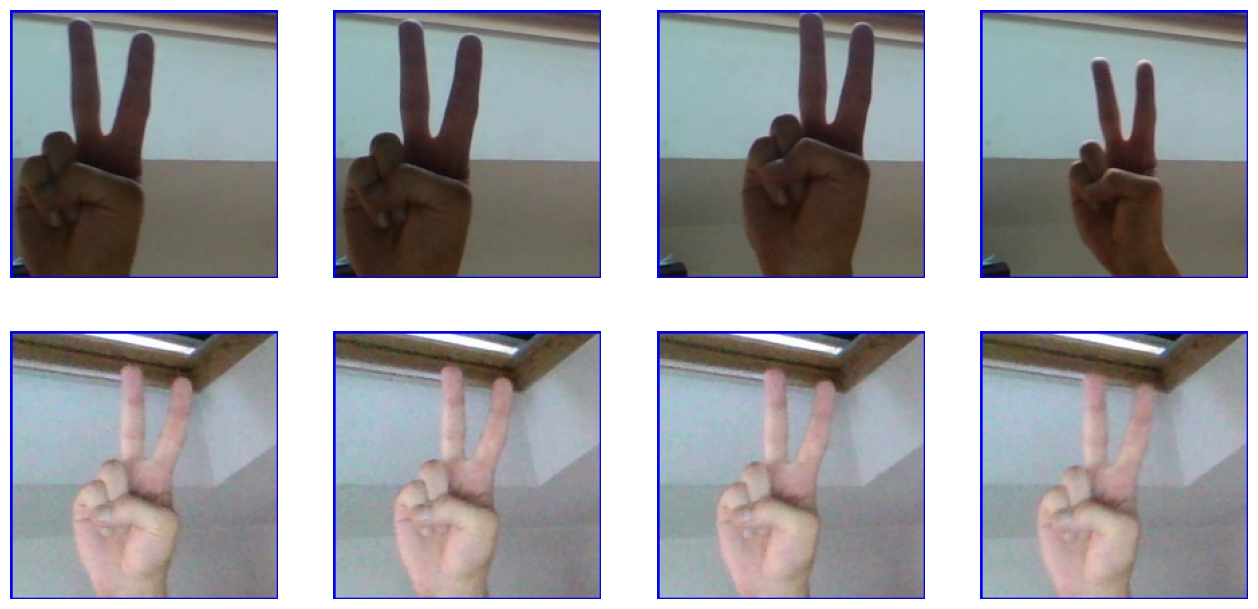

Image of alphabet V


In [50]:
import random

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

random_col = random.choice(list(dataset.columns))
random_image_path = [i for i in list(dataset.loc[:7, random_col])]

nrows = 4
ncols = 4


pic_index = 0

#setup matplotlib fig and size it to fit 4x4 img
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

for i, img_path in enumerate(random_image_path):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') #disable grid lines
    
    img = mpimg.imread(img_path)
    plt.imshow(img) 

plt.show()
print('Image of alphabet ' + random_col)

In [51]:
file_list = {}

target_success = 1000
data = dataset

for idx in data:
    file_list[idx] = data[idx].values

In [52]:
landmarks = ['class']
for val in range(1, 22):
    landmarks += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val)]
    landmarks += ['x{}'.format(val), 'y{}'.format(val)]
    
with open('hand_dataset.csv', mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(landmarks)

In [53]:
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

In [74]:
with mp_hands.Hands( static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5) as hands:
        
    for idx, files in file_list.items():
        success = 0
        
        for file in files : 
            image = cv2.flip(cv2.imread(file), 1)
            results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            if success < target_success:
                try :
                    for hand_landmark in results.multi_hand_landmarks:
                        right_hand = hand_landmark.landmark
                    right_hand_row = list(np.array([[landmark.x, landmark.y] for landmark in right_hand]).flatten())
                    row = right_hand_row
                    row.insert(0, file.split('\\')[2])
                    with open('hand_dataset.csv', mode='a', newline='') as f:
                        csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                        csv_writer.writerow(row) 
                    success += 1
                except :
                    pass
                print('Handedness:', results.multi_handedness)
                if not results.multi_hand_landmarks:
                    continue
                image_height, image_width, _ = image.shape
                annotated_image = image.copy()
                for hand_landmarks in results.multi_hand_landmarks:
                    print('hand_landmarks:', hand_landmarks)
                    print(
                        f'Index finger tip coordinates: (',
                        f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
                        f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height})'
                    )
                    mp_drawing.draw_landmarks(
                        annotated_image, hand_landmarks, mp_hands.HAND_CONNECTIONS)

                if not os.path.exists('tmp'):
                    os.mkdir('./tmp')

                cv2.imwrite('./tmp/' + file.split('\\')[2] + str(idx) + '.png', cv2.flip(annotated_image, 1))
            else :
                break

Handedness: None
Handedness: None
Handedness: [classification {
  index: 1
  score: 0.949473
  label: "Right"
}
]
hand_landmarks: landmark {
  x: 0.567482412
  y: 0.622410595
  z: -2.79994822e-007
}
landmark {
  x: 0.485357404
  y: 0.625095487
  z: -0.0226809122
}
landmark {
  x: 0.403452039
  y: 0.587263107
  z: -0.0412602797
}
landmark {
  x: 0.330897182
  y: 0.559712172
  z: -0.0610855669
}
landmark {
  x: 0.265173316
  y: 0.542432249
  z: -0.0783537179
}
landmark {
  x: 0.469012946
  y: 0.449622303
  z: -0.00801991206
}
landmark {
  x: 0.391934723
  y: 0.396945059
  z: -0.0351176672
}
landmark {
  x: 0.326776683
  y: 0.376605
  z: -0.0606374405
}
landmark {
  x: 0.272273362
  y: 0.371063948
  z: -0.0779715627
}
landmark {
  x: 0.48018077
  y: 0.430943847
  z: -0.0151744448
}
landmark {
  x: 0.391823649
  y: 0.37273854
  z: -0.0380802266
}
landmark {
  x: 0.320975155
  y: 0.35646081
  z: -0.0560372844
}
landmark {
  x: 0.266229212
  y: 0.353892833
  z: -0.0691213086
}
landmark {
  x

KeyboardInterrupt: 